In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import glob
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-09-18 12:45:18.111360: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-18 12:45:18.269255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 12:45:18.894261: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 12:45:18.895829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 12:45:20.167491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [3]:
import pathlib
import seaborn as sns
from keras.models import Sequential 
from keras.applications import ResNet50
from keras.layers import Dense,GlobalAveragePooling2D

In [4]:
dataset = pathlib.Path("lung_colon_image_set/")
images = list(dataset.glob('*/*/*.jpeg'))

In [5]:
print(f"Length Of Images : {len(images)}")


Length Of Images : 25000


In [6]:
lbt = dataset.glob('lung_image_sets/lung_n/*')
laca = dataset.glob('lung_image_sets/lung_aca/*')
lscc = dataset.glob('lung_image_sets/lung_scc/*')
cacc = dataset.glob('colon_image_sets/colon_aca/*')
cbt = dataset.glob('colon_image_sets/colon_n/*')

In [7]:
lung_benign_tissue = list(lbt)
lung_adenocarcinoma = list(laca)
lung_squamous_cell_carcinoma = list(lscc)
colon_adenocarcinoma = list(cacc)
colon_benign_tissue = list(cbt)

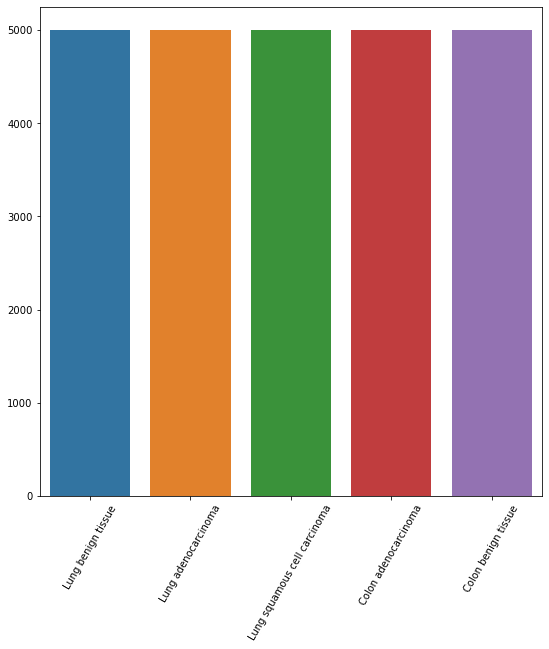

In [8]:
x = ['Lung benign tissue','Lung adenocarcinoma','Lung squamous cell carcinoma','Colon adenocarcinoma','Colon benign tissue']
y = [len(lung_benign_tissue),len(lung_adenocarcinoma),len(lung_squamous_cell_carcinoma),len(colon_adenocarcinoma),len(colon_benign_tissue)]

plt.figure(figsize=(9,9))
sns.barplot(x=x,y=y)
plt.xticks(rotation = 60)
plt.show()

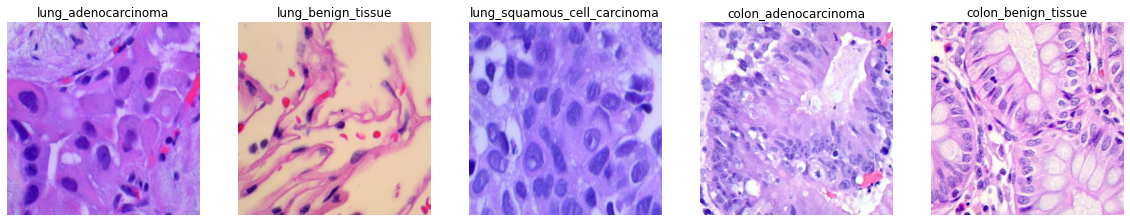

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(1,5,1)
img1 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_aca/lungaca1.jpeg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  
plt.axis('off') 
plt.title('lung_adenocarcinoma')

plt.subplot(1,5,2)
img2 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_n/lungn1000.jpeg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('lung_benign_tissue')

plt.subplot(1,5,3)
img3 = cv2.imread('lung_colon_image_set/lung_image_sets/lung_scc/lungscc1010.jpeg')
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('lung_squamous_cell_carcinoma')

plt.subplot(1,5,4)
img4 = cv2.imread('lung_colon_image_set/colon_image_sets/colon_aca/colonca1436.jpeg')
plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('colon_adenocarcinoma')

plt.subplot(1,5,5)
img2 = cv2.imread('lung_colon_image_set/colon_image_sets/colon_n/colonn1001.jpeg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('colon_benign_tissue')

plt.show()

In [10]:
label_dict = {
    'lung_benign_tissue' : 0,
    'lung_adenocarcinoma' : 1,
    'lung_squamous_cell_carcinoma' : 2,
    'colon_adenocarcinoma' : 3,
    'colon_benign_tissue' : 4
}

image_dict = {
    'lung_benign_tissue' : lung_benign_tissue,
    'lung_adenocarcinoma' : lung_adenocarcinoma,
    'lung_squamous_cell_carcinoma' : lung_squamous_cell_carcinoma,
    'colon_adenocarcinoma' : colon_adenocarcinoma,
    'colon_benign_tissue' :colon_benign_tissue
}

In [11]:
x,y = [],[]

for name,images in image_dict.items():
    for img in images:
        i = cv2.imread(str(img))
        resized_image = cv2.resize(i,(229,229))
        x.append(resized_image)
        y.append(label_dict[name])

x = np.array(x)
y = np.array(y)


Train Test Split of the data


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=10)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=100)

print("Number of training data : ",len(x_train))
print("Number of testing data : ",len(x_test))
print("Number of validation data : ",len(x_val))



Number of training data :  20000
Number of testing data :  2500
Number of validation data :  2500


In [13]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)


In [14]:
model = Sequential()
model.add(ResNet50(weights='imagenet', include_top=False,pooling='avg',input_shape=(229,229,3)))
model.add(Dense(5, activation='softmax'))
model.layers[0].trainable=False             
model.summary()
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs = 2,batch_size=8)

: 